In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# importing the data for power consumption 
#url = "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
data = pd.read_csv('opsd_germany_daily.csv')

In [52]:
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [53]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [63]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [54]:
data = data.set_index('Date')

In [62]:
# if there are any values that are missing then we can add the missing date by saying that the data is collected sequentially
# so you can just add the missing dates 
data_freq = data.asfreq('D',method='ffill')
data_freq

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [56]:
data = data.ffill()

In [65]:
data.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [75]:
# resampling in periods of weeks months and rolling weekly 
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_res_weekly = data[data_columns].resample('W').mean()
print(data_res_weekly)

            Consumption        Wind      Solar  Wind+Solar
Date                                                      
2006-01-01  1069.184000         NaN        NaN         NaN
2006-01-08  1381.300143         NaN        NaN         NaN
2006-01-15  1486.730286         NaN        NaN         NaN
2006-01-22  1490.031143         NaN        NaN         NaN
2006-01-29  1514.176857         NaN        NaN         NaN
...                 ...         ...        ...         ...
2017-12-03  1536.236314  284.334286  18.320857  302.655143
2017-12-10  1554.824946  636.514714  16.440286  652.955000
2017-12-17  1543.856889  442.531857  18.143714  460.675571
2017-12-24  1440.342401  339.018429   9.895143  348.913571
2017-12-31  1203.265211  604.699143  19.240143  623.939286

[627 rows x 4 columns]


In [77]:
# mothly sampling by taking the max 
data_res_monthly = data[data_columns].resample('M').max()
print(data_res_monthly)

            Consumption     Wind    Solar  Wind+Solar
Date                                                 
2006-01-31   1613.31200      NaN      NaN         NaN
2006-02-28   1606.66700      NaN      NaN         NaN
2006-03-31   1545.83400      NaN      NaN         NaN
2006-04-30   1447.79800      NaN      NaN         NaN
2006-05-31   1380.17500      NaN      NaN         NaN
...                 ...      ...      ...         ...
2017-08-31   1434.05200  455.379  216.117     601.010
2017-09-30   1460.61621  761.751  168.123     838.572
2017-10-31   1508.51484  819.818  123.715     846.617
2017-11-30   1617.03309  743.280   57.358     772.775
2017-12-31   1651.90418  812.422   42.994     822.371

[144 rows x 4 columns]


In [81]:
# rolling week sampling 
data_7d_rol = data[data_columns].rolling(window = 7 , center = True).mean()
data_7d_rol

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


In [82]:
data_365d_rol = data[data_columns].rolling(window = 365 , center = True).mean()

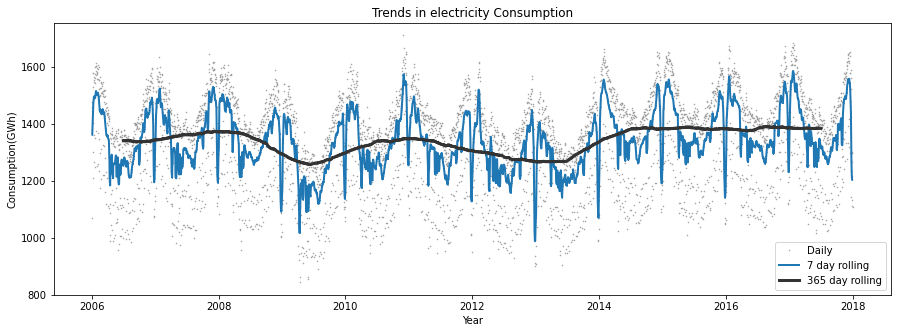

In [139]:
fig , ax = plt.subplots(figsize = (15,5))

#plotting daily data 
ax.plot(data['Consumption'], marker = '.', markersize =1, color = '0.6', linestyle='None', label = 'Daily')

# plotting 7 day rolling mean 
ax.plot(data_7d_rol['Consumption'], marker = 'x', markersize=0.2,linewidth = 2, label = '7 day rolling')

#plotting 365 day mean
ax.plot(data_365d_rol['Consumption'] , color = '0.2', linewidth = 3, label = '365 day rolling')

# plot butification 

#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption(GWh)')
ax.set_title('Trends in electricity Consumption')
plt.show()

In [104]:
data_first_order_diff=data[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].diff()

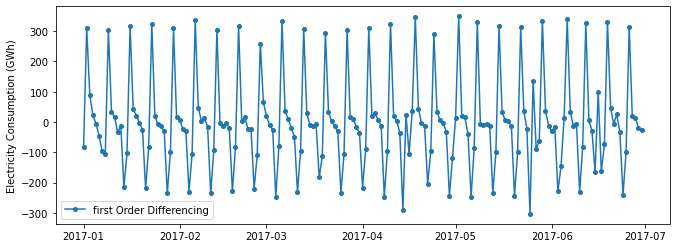

In [106]:
# plotting only a part of the data 
# see how we can use the datetime object 

start,end = '2017-01', '2017-06'
fig,ax = plt.subplots(figsize=(11,4))

ax.plot(data_first_order_diff.loc[start:end, 'Consumption'], marker='o', markersize = 4, linestyle = '-', label = 'first Order Differencing')

ax.set_ylabel('Electricity Consumption (GWh)')
ax.legend();

<AxesSubplot:xlabel='Date'>

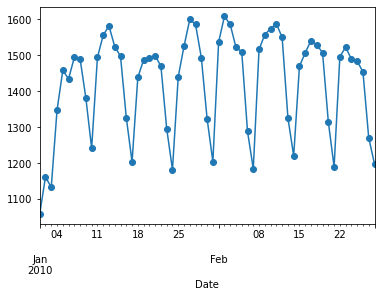

In [112]:
data.loc['2010-01':'2010-02','Consumption'].plot(marker='o')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

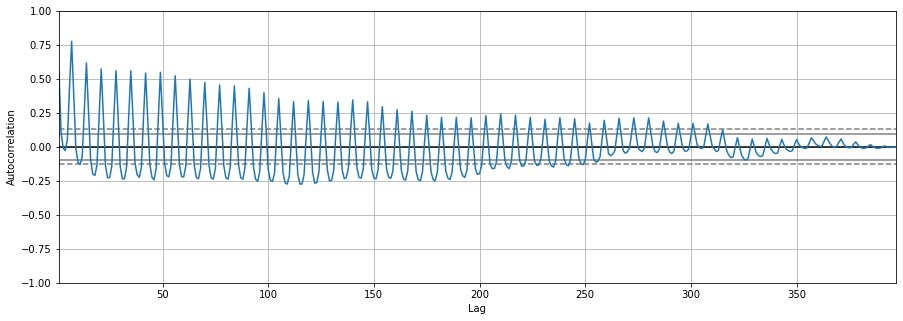

In [117]:
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(data.loc['2012-01':'2013-01', 'Consumption'])

In [136]:
# extracting date month and days_name of the week 

data['Year'] = data.index.year
data['Month'] = data.index.month
data['day_of_week'] = data.index.day

Date
2006-01-01     1
2006-01-02     2
2006-01-03     3
2006-01-04     4
2006-01-05     5
              ..
2017-12-27    27
2017-12-28    28
2017-12-29    29
2017-12-30    30
2017-12-31    31
Name: day_of_week, Length: 4383, dtype: int64

In [122]:
# boxplots 
import seaborn as sns

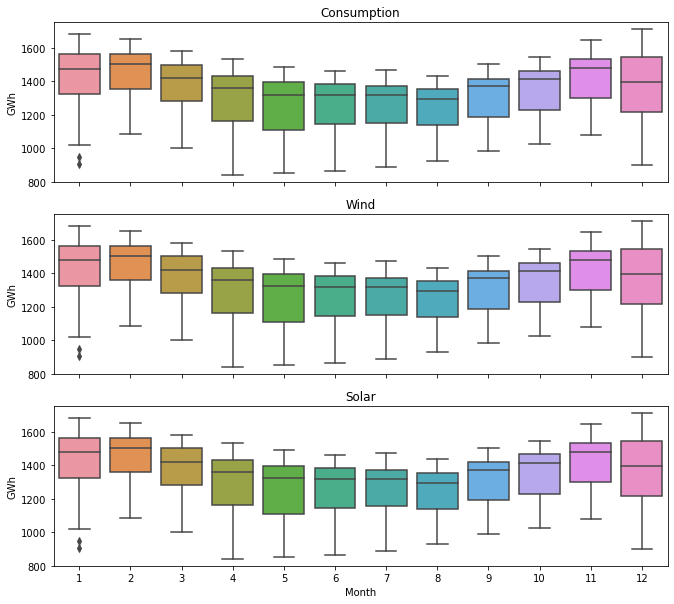

In [141]:
fig,axes = plt.subplots(3,1,figsize=(11,10), sharex = True)

for name, ax in zip(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], axes):
    sns.boxplot(data=data, x ='Month', y='Consumption', ax = ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel(' ')

In [ ]:
# Performance Metric 
# we shall use rmse and r squared error 

In [274]:
import sklearn.metrics as metrics

def regression_result(y_true , y_pred):
    # regression metrics 
    explained_variance = metrics.explained_variance_score(y_true,y_pred)
    
    mean_aboslute_error = metrics.mean_absolute_error(y_true,y_pred)
    
    mse = metrics.mean_squared_log_error(y_true,y_pred)
    
    mean_squared_log_error = metrics.mean_squared_log_error(y_true,y_pred)
    
    r2 = metrics.r2_score(y_true,y_pred)
    
    
    # print statements 
    
    print('explained_variance:', round(explained_variance,4))
    print('mean_aboslute_error:', round(mean_aboslute_error,4))
    print('mse : ', round(mse ,4))
    print(' mean_squared_log_error : ', round( mean_squared_log_error,4))
    print('r2 :', round(r2,4))
    print('RMSE :', round(np.sqrt(mse) ,4))

In [262]:
# creating new dataframe for consumption columns

data_consumption = data[['Consumption']]

#inserting new column with yesterdays  consumption values 
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Consumption'].shift()

# inserting another column with difference b/w yesterday and day before yesterday consumption
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()

data_consumption = data_consumption.dropna()

C:\Users\gamer\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gamer\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [263]:
data_consumption

,Consumption,Yesterday,Yesterday_Diff
Date,,,
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
2006-01-06,1403.42700,1477.13100,19.91400
2006-01-07,1300.28700,1403.42700,-73.70400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


In [264]:
# defining training and test sets 

X_train = data_consumption[:'2016'].drop(['Consumption'],axis=1)
y_train = data_consumption.loc[:'2016', 'Consumption']

X_test = data_consumption['2017'].drop(['Consumption'],axis=1)
y_test = data_consumption.loc['2017','Consumption']

In [265]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


LR : 0.343747 (0.029773)


C:\Users\gamer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\gamer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\gamer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

NN : 0.465757 (0.183368)
KNN : 0.646307 (0.083185)
RF : 0.626808 (0.072919)
SVR : -0.117944 (0.157755)


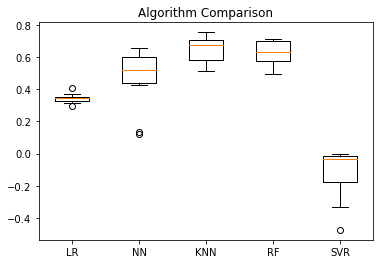

In [266]:
# spot check algorithm 

models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver='lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF',RandomForestRegressor(n_estimators=10)))
models.append(('SVR',SVR(gamma='auto')))

#Evaluate each model in turn 
results=[]
names=[]
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=10)
    cv_results = cross_val_score(model,X_train,y_train,cv=tscv,scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,cv_results.mean(),cv_results.std()))

#compare algorithms 
plt.boxplot(results,labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [267]:
# writing a function for our own user defined scoring system 
from sklearn.metrics import make_scorer

def rmse(actual,predict):
    
    predict = np.array(predict)
    actual = np.array(actual)
    
    distance = predict - actual
    
    square_distance = distance**2
    
    mean_square_distance = square_distance.mean()
    
    score = np.sqrt(mean_square_distance)
    
    return score 

rmse_scorer = make_scorer(rmse, greater_is_better = False)

In [268]:
# grid searching for best parameters for random forest 

from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

param_search = {
    'n_estimators':[20,50,100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[i for i in range(5,15)]
}

tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator = model, cv=tscv, param_grid = param_search, scoring = rmse_scorer)

gsearch.fit(X_train,y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50, 100]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [269]:
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [270]:
print(best_score)

-90.17891531227868


In [271]:
gsearch.best_estimator_

RandomForestRegressor(max_depth=8, max_features='sqrt')

In [272]:
gsearch.best_params_

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}

In [275]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
#print(y_test)

y_true = y_true.reshape((365, 1))
y_pred = y_pred.reshape((365, 1))

regression_result(y_true,y_pred)

explained_variance: 0.7301
mean_aboslute_error: 56.0183
mse :  0.0041
 mean_squared_log_error :  0.0041
r2 : 0.7276
RMSE : 0.064


In [284]:
# seeing if (t - 2) day has any effect on our data

data_consumption_2o = data_consumption.copy()

#inserting column with yesterday-1 values 
data_consumption_2o['Yesterday-1'] = data_consumption_2o['Yesterday'].shift()

data_consumption_2o['Yesterday-1_Diff'] = data_consumption_2o['Yesterday-1'].diff()

data_consumption_2o = data_consumption_2o.dropna()

In [292]:
X_train_2o = data_consumption_2o[:'2016'].drop(['Consumption'], axis=1)
y_train_2o = data_consumption_2o.loc[:'2016','Consumption']

X_test = data_consumption_2o['2017'].drop(['Consumption'],axis=1)
y_test = data_consumption_2o.loc['2017','Consumption']

In [293]:
# using the same gridserach cv again but with this new data 

model = RandomForestRegressor()

param_search = {
    'n_estimators':[20,50,100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[i for i in range(5,15)]
}

tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator = model, cv=tscv, param_grid = param_search, scoring = rmse_scorer)

gsearch.fit(X_train_2o,y_train_2o)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50, 100]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [299]:
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)

regression_result(y_true,y_pred)

explained_variance: 0.8385
mean_aboslute_error: 40.671
mse :  0.0025
 mean_squared_log_error :  0.0025
r2 : 0.8385
RMSE : 0.0501


In [296]:
print(best_model)
print(best_score)

RandomForestRegressor(max_depth=11, max_features='log2')

In [300]:
# we shall consider the weekly shift of data thingy 

data_consumption_weeklyshift = data_consumption_2o.copy()
data_consumption_weeklyshift['Last_week'] = data_consumption_2o['Consumption'].shift(7)

data_consumption_weeklyshift = data_consumption_weeklyshift.dropna()


In [301]:
X_train_weeklyshift = data_consumption_weeklyshift[:'2016'].drop(['Consumption'], axis=1)
y_train_weeklyshift = data_consumption_weeklyshift.loc[:'2016','Consumption']

X_test = data_consumption_weeklyshift['2017'].drop(['Consumption'],axis=1)
y_test = data_consumption_weeklyshift.loc['2017','Consumption']

In [302]:
model = RandomForestRegressor()

param_search = {
    'n_estimators':[20,50,100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[i for i in range(5,15)]
}

tscv = TimeSeriesSplit(n_splits=10)

gsearch = GridSearchCV(estimator = model, cv=tscv, param_grid = param_search, scoring = rmse_scorer)

gsearch.fit(X_train_weeklyshift,y_train_weeklyshift)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50, 100]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [303]:
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)

regression_result(y_true,y_pred)

explained_variance: 0.9113
mean_aboslute_error: 29.0837
mse :  0.0014
 mean_squared_log_error :  0.0014
r2 : 0.9113
RMSE : 0.0376


In [314]:
# this is how to get the importance of a feature 
imp = best_model.feature_importances_
features = X_train_weeklyshift.columns
indices = np.argsort(imp)

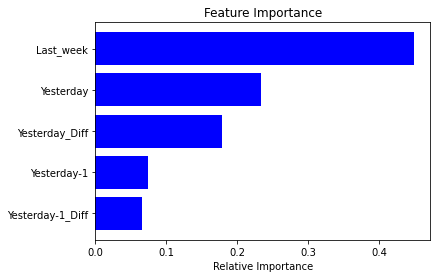

In [317]:
plt.title('Feature Importance')
plt.barh(range(len(indices)),imp[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Let's try 2 things tomorrow 
# First  - Try to plot both the pred and the true value on the same plot 
# Second - Using KNN and do the same thing 
# Third  - Try to plot both the pred and the true value on the same plot
# Fourth - Make a list of all the important code used in this project 

# Prediction with RNN / LSTM 

In [20]:
data = pd.read_csv('opsd_germany_daily.csv')
data = data[['Date','Consumption']]

In [22]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

<AxesSubplot:xlabel='Date'>

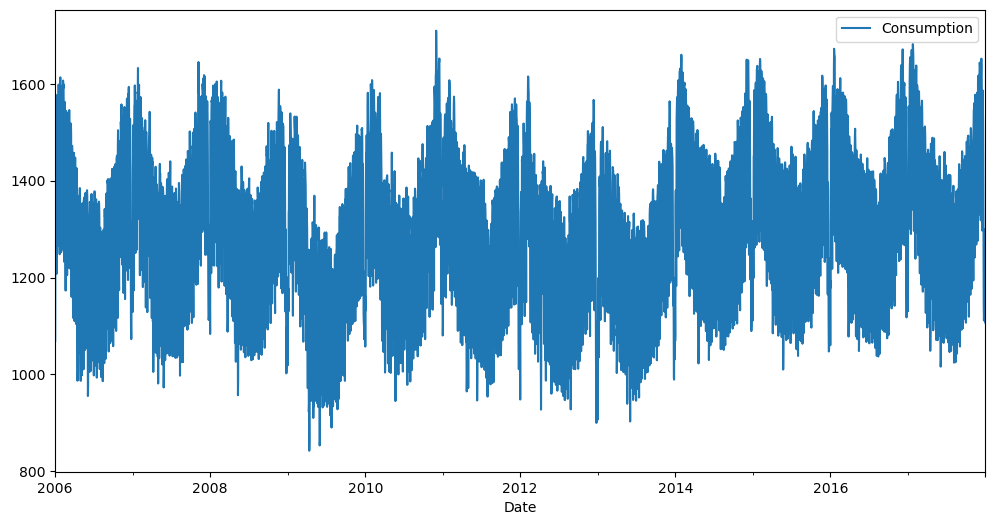

In [23]:
data.plot(figsize=(12,6))

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose


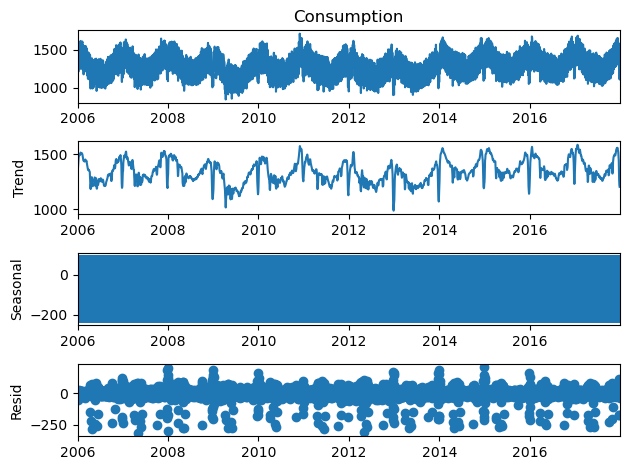

In [27]:
results = seasonal_decompose(data['Consumption'])
results.plot();
     